In [11]:
import numpy as np 
import cv2
from matplotlib import pyplot as plt 
%matplotlib inline 


In [13]:
img = cv2.imread('./test-img/pedri-test.webp')
img.shape

(750, 1200, 3)

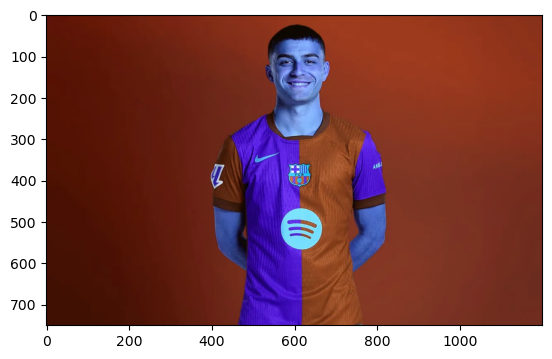

In [17]:
plt.imshow(img)
plt.show()

In [21]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(750, 1200)

In [23]:
gray

array([[25, 25, 25, ..., 26, 26, 26],
       [25, 25, 25, ..., 40, 40, 40],
       [25, 25, 25, ..., 51, 51, 51],
       ...,
       [18, 18, 18, ..., 48, 48, 48],
       [18, 18, 18, ..., 48, 48, 48],
       [18, 18, 18, ..., 48, 48, 48]], dtype=uint8)

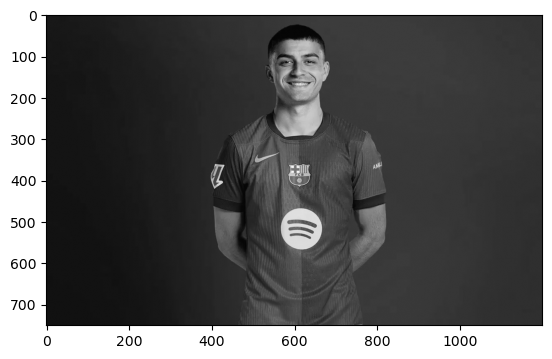

In [29]:
plt.imshow(gray, cmap='gray')
plt.show()


In [31]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[537,  52, 156, 156]], dtype=int32)

In [37]:
(x, y, w, h) = faces[0]
x, y, w, h

(537, 52, 156, 156)

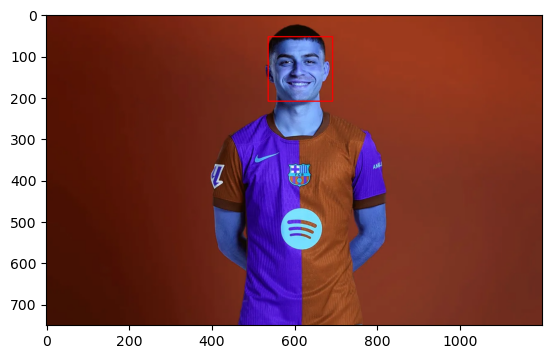

In [42]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)
plt.show()

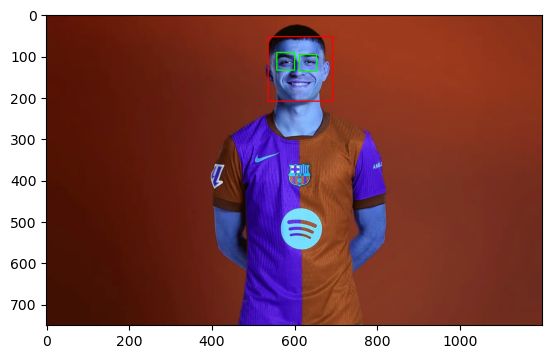

In [46]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

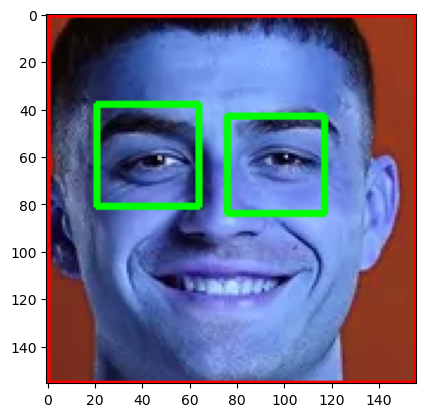

In [50]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')
plt.show()

In [54]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color
    

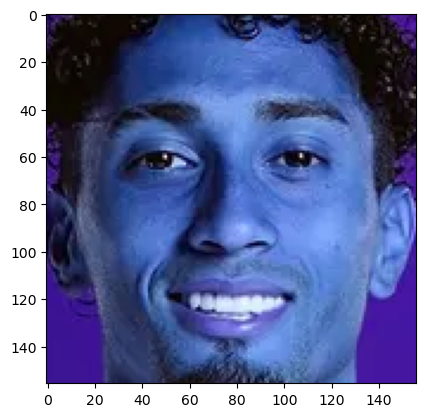

In [62]:
cropped_image = get_cropped_image_if_2_eyes("./test-img/raphinha-test.webp")
plt.imshow(cropped_image)
plt.show()

In [68]:
cropped_image1 = get_cropped_image_if_2_eyes("./test-img/lamine-fail-test.webp")
cropped_image1

In [70]:
path_to_data = './data'
path_to_cr_data = './data/cropped/'

In [74]:
import os
img_drs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_drs.append(entry.path)
        

In [76]:
print(img_drs)

['./data/maria_sharapova', './data/virat_kohli', './data/lionel_messi', './data/serena_williams', './data/roger_federer']


In [94]:
import shutil
if os.path.exists(path_to_cr_data):
    # removing the folder
     shutil.rmtree(path_to_cr_data)

os.mkdir(path_to_cr_data)

In [96]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_drs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./data/cropped/maria_sharapova
Generating cropped images in folder:  ./data/cropped/virat_kohli
Generating cropped images in folder:  ./data/cropped/lionel_messi
Generating cropped images in folder:  ./data/cropped/serena_williams
Generating cropped images in folder:  ./data/cropped/roger_federer
